In [45]:
#import python libraries
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from dataframe_cleaner import DataFrameCleaner
from dataframe_outlier import *
from plot_data import *
from dataframe_info import DataFrameInfo
from user_overview import UserOverviewScript

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [5]:
#load and read engagement and experience Telecom-dataset
customer_engagement = pd.read_csv('../data/user_engagement_analysis.csv')
customer_experience = pd.read_csv('../data/user_experiance_analysis.csv')

In [6]:
customer_engagement.head()

,Customer_Id,Cluster,Session_Frequency,Duration,Total_Data_Volume
0,33601001722.00,1,1.00,116720.00,878690574.00
1,33601001754.00,0,1.00,181230.00,156859643.00
2,33601002511.00,0,1.00,134969.00,595966483.00
3,33601007832.00,3,1.00,49878.00,422320698.00
4,33601008617.00,2,2.00,37104.00,1457410944.00


In [7]:
customer_experience.head()

,MSISDN_Number,Cluster,Total_Avg_RTT,Total_Avg_Bearer_TP,Total_Avg_TCP
0,33601001722.00,2,0.00,76.00,2068.83
1,33601001754.00,0,0.00,99.00,580.35
2,33601002511.00,0,0.01,97.00,580.35
3,33601007832.00,0,0.02,248.00,198.99
4,33601008617.00,1,0.01,56844.00,970.59


In [8]:
customer_experience.rename(columns = {'MSISDN_Number':'Customer_Id'}, inplace=True)
customer_experience.head()

,Customer_Id,Cluster,Total_Avg_RTT,Total_Avg_Bearer_TP,Total_Avg_TCP
0,33601001722.00,2,0.00,76.00,2068.83
1,33601001754.00,0,0.00,99.00,580.35
2,33601002511.00,0,0.01,97.00,580.35
3,33601007832.00,0,0.02,248.00,198.99
4,33601008617.00,1,0.01,56844.00,970.59


# Task 4 - User Satisfaction Analysis

analyzing user satisfaction based on engagement & experience analysis result

Assign of user engagement score

In [9]:
#read user engagement model
with open("../models/user_engagement_analysis.pkl", "rb") as file:
    kmeans_engage = pickle.load(file)
less_engaged_score = 3

In [10]:
engagement_df = customer_engagement.set_index('Customer_Id')[
    ['Duration', 'Total_Data_Volume', 'Session_Frequency']]
scaler = StandardScaler()
scaled_array = scaler.fit_transform(engagement_df)
pd.DataFrame(scaled_array).head(5)

,0,1,2
0,-0.07,0.54,-0.55
1,0.74,-1.28,-0.55
2,0.16,-0.17,-0.55
3,-0.92,-0.61,-0.55
4,-1.08,2.00,0.98


In [11]:
normalized_data = normalize(scaled_array)
pd.DataFrame(normalized_data).head(5)

,0,1,2
0,-0.09,0.70,-0.71
1,0.47,-0.81,-0.35
2,0.26,-0.29,-0.92
3,-0.74,-0.50,-0.45
4,-0.44,0.81,0.39


In [12]:
distance = kmeans_engage.fit_transform(normalized_data)
distance_from_less_engaged_score = list(
    map(lambda x: x[less_engaged_score], distance))
customer_engagement['Engagement_Score'] = distance_from_less_engaged_score
customer_engagement.head(5)

,Customer_Id,Cluster,Session_Frequency,Duration,Total_Data_Volume,Engagement_Score
0,33601001722.00,1,1.00,116720.00,878690574.00,1.45
1,33601001754.00,0,1.00,181230.00,156859643.00,0.92
2,33601002511.00,0,1.00,134969.00,595966483.00,0.93
3,33601007832.00,3,1.00,49878.00,422320698.00,0.36
4,33601008617.00,2,2.00,37104.00,1457410944.00,1.72


Assign User Experience Score

In [33]:
#load and read user experience model
with open("../models/user_experiance.pkl", "rb") as file_e:
    kmeans_expr = pickle.load(file_e)
worst_experience = 0

In [34]:
experience_df = customer_experience.set_index('Customer_Id')[
    ['Total_Avg_RTT', 'Total_Avg_Bearer_TP', 'Total_Avg_TCP']]
scaler = StandardScaler()
scaled_array = scaler.fit_transform(experience_df)
pd.DataFrame(scaled_array).head(5)

,0,1,2
0,-1.09,-0.66,1.74
1,-0.98,-0.66,-0.49
2,-0.54,-0.66,-0.49
3,0.55,-0.66,-1.07
4,-0.54,1.78,0.09


In [35]:
normalized_data = normalize(scaled_array)
pd.DataFrame(normalized_data).head(5)

,0,1,2
0,-0.50,-0.31,0.81
1,-0.76,-0.52,-0.39
2,-0.55,-0.67,-0.50
3,0.40,-0.48,-0.78
4,-0.29,0.96,0.05


In [36]:
experience_df = customer_experience.set_index('Customer_Id')
distance = kmeans_expr.fit_transform(normalized_data)
distance_from_worst_experience = list(
    map(lambda x: x[worst_experience], distance))
customer_experience['Experience_Score'] = distance_from_worst_experience
customer_experience.head(5)

,Customer_Id,Cluster,Total_Avg_RTT,Total_Avg_Bearer_TP,Total_Avg_TCP,Experience_Score
0,33601001722.00,2,0.00,76.00,2068.83,1.37
1,33601001754.00,0,0.00,99.00,580.35,0.29
2,33601002511.00,0,0.01,97.00,580.35,0.16
3,33601007832.00,0,0.02,248.00,198.99,0.96
4,33601008617.00,1,0.01,56844.00,970.59,1.61


Task 4.2:  Consider the average of both Engagement & Experience Scores as the satisfaction score & report the top 10 satisfied customers

In [37]:
# retrieve customers' ID for engagement
user_id_engage = customer_engagement['Customer_Id'].values
user_id_exper = customer_experience['Customer_Id'].values
user_intersection = list(set(user_id_engage).intersection(user_id_exper))
user_intersection[:5]

[33662697474.0, 33665581058.0, 33628094468.0, 33666105351.0, 33782497288.0]

In [38]:
df_user_engage = customer_engagement[customer_engagement['Customer_Id'].isin(user_intersection)]
df_user_engage.shape

(106471, 6)

In [39]:
df_user_exper = customer_experience[customer_experience['Customer_Id'].isin(user_intersection)]
df_user_exper.shape

(106471, 6)

Combine Engagement and Experience score to get the user Satisfaction Score

In [40]:
user_df = pd.merge(df_user_engage, df_user_exper, on='Customer_Id')
user_df['Satisfaction_Score'] = (
    user_df['Engagement_Score'] + user_df['Experience_Score'])/2
user_df.head(5)

,Customer_Id,Cluster_x,Session_Frequency,Duration,Total_Data_Volume,Engagement_Score,Cluster_y,Total_Avg_RTT,Total_Avg_Bearer_TP,Total_Avg_TCP,Experience_Score,Satisfaction_Score
0,33601001722.00,1,1.00,116720.00,878690574.00,1.45,2,0.00,76.00,2068.83,1.37,1.41
1,33601001754.00,0,1.00,181230.00,156859643.00,0.92,0,0.00,99.00,580.35,0.29,0.60
2,33601002511.00,0,1.00,134969.00,595966483.00,0.93,0,0.01,97.00,580.35,0.16,0.54
3,33601007832.00,3,1.00,49878.00,422320698.00,0.36,0,0.02,248.00,198.99,0.96,0.66
4,33601008617.00,2,2.00,37104.00,1457410944.00,1.72,1,0.01,56844.00,970.59,1.61,1.66


In [41]:
sat_score_df = user_df[['Customer_Id', 'Engagement_Score',
                        'Experience_Score', 'Satisfaction_Score']]
sat_score_df = sat_score_df.set_index('Customer_Id')
sat_score_df.head(5)

,Engagement_Score,Experience_Score,Satisfaction_Score
Customer_Id,,,
33601001722.00,1.45,1.37,1.41
33601001754.00,0.92,0.29,0.60
33601002511.00,0.93,0.16,0.54
33601007832.00,0.36,0.96,0.66
33601008617.00,1.72,1.61,1.66


In [43]:
sorted_by_satisf = sat_score_df.sort_values('Satisfaction_Score', ascending=False)
sat_top_10 = sorted_by_satisf['Satisfaction_Score'].head(10)
sat_top_10

Customer_Id
33680518496.00   1.92
33658965574.00   1.92
33667677500.00   1.92
33662743834.00   1.92
33667945853.00   1.92
33660296914.00   1.92
33763887232.00   1.92
33699633196.00   1.92
33767624962.00   1.92
33659365443.00   1.92
Name: Satisfaction_Score, dtype: float64

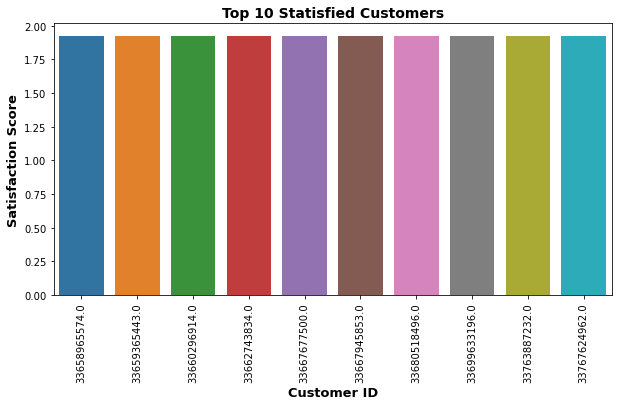

In [44]:
plot_bar(sat_top_10, 'Top 10 Statisfied Customers', 'Customer ID', 'Satisfaction Score')

In [47]:
X = sat_score_df[['Engagement_Score', 'Experience_Score']] 
Y = sat_score_df[['Satisfaction_Score']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

linear_regression = LinearRegression()
model = linear_regression.fit(X_train, Y_train)
pred = model.predict(X_test)
pred

array([[0.6392866 ],
       [1.40234486],
       [0.59163264],
       ...,
       [1.45007558],
       [0.65159167],
       [1.74585545]])